In [420]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [421]:
data=pd.read_csv("Downloads/water_potability.csv")

In [422]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [423]:
data.shape

(3276, 10)

In [424]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [425]:
len(data.columns)

10

In [426]:
data.shape

(3276, 10)

In [427]:
data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [428]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [429]:
data["Potability"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:>

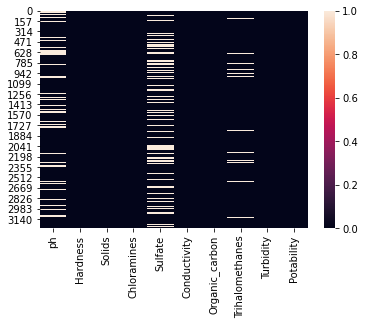

In [430]:
sb.heatmap(pd.isnull(data))

In [431]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [432]:
data.drop("Sulfate",axis=1,inplace=True)

In [433]:
data["ph"][data["Potability"]==0].mean()

7.085378435983544

In [434]:
data["ph"][data["Potability"]==1].mean()

7.0737832953812

In [435]:
data["Trihalomethanes"][data["Potability"]==0].mean()

66.30355527306088

In [436]:
data["Trihalomethanes"][data["Potability"]==1].mean()

66.53968374070116

In [437]:
for i in range(len(data)):
    if pd.isnull(data.loc[i,"ph"])==True:
        if data.loc[i,"Potability"]==1:
            data.loc[i,"ph"]=7.0737832
        else:
            data.loc[i,"ph"]=7.0853784
    if pd.isnull(data.loc[i,"Trihalomethanes"])==True:
        if data.loc[i,"Potability"]==1:
            data.loc[i,"Trihalomethanes"]=66.539683
        else:
            data.loc[i,"Trihalomethanes"]=66.303555527

<AxesSubplot:>

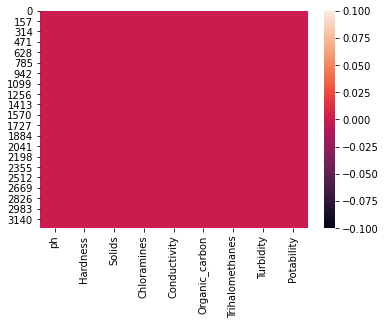

In [438]:
sb.heatmap(pd.isnull(data))

In [439]:
data.describe()

,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080855,196.369496,22014.092526,7.122277,426.205111,14.284970,66.395671,3.966786,0.390110
std,1.469958,32.879761,8768.570828,1.583085,80.824064,3.308162,15.769901,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.085378,196.967627,20927.833607,7.130299,421.884968,14.218338,66.303556,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,753.342620,28.300000,124.000000,6.739000,1.000000


C:\Users\GauravSah\anaconda3\envs\water_quality\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ph', ylabel='Density'>

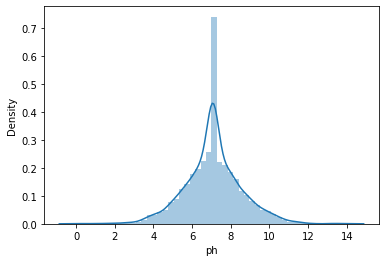

In [440]:
sb.distplot(data["ph"])

C:\Users\GauravSah\anaconda3\envs\water_quality\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hardness', ylabel='Density'>

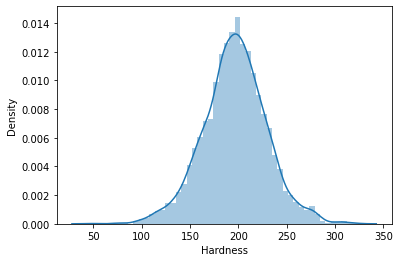

In [441]:
sb.distplot(data["Hardness"],kde=True)

In [442]:
from sklearn.preprocessing import StandardScaler

In [443]:
x=data.drop("Potability",axis=1)
y=data["Potability"]

In [444]:
sc=StandardScaler()

In [445]:
x[x.columns]=sc.fit_transform(x[x.columns])

In [446]:
x.head()

,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.003078,0.259195,-0.139471,0.112415,1.708954,-1.180651,1.306187,-1.286298
1,-2.289378,-2.036414,-0.385987,-0.307694,2.062575,0.270597,-0.638440,0.684218
2,0.692826,0.847665,-0.240047,1.360594,-0.094032,0.781117,0.001549,-1.167365
3,0.840908,0.547651,0.000493,0.592008,-0.778830,1.255134,2.152910,0.848412
4,1.368526,-0.464429,-0.460249,-0.363698,-0.343939,-0.824357,-2.181556,0.138786


In [447]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [448]:
from sklearn.tree import ExtraTreeClassifier

In [449]:
feat_sel=ExtraTreeClassifier()

In [450]:
feat_sel.fit(x,y)

ExtraTreeClassifier()

In [451]:
feat_sel.feature_importances_

array([0.13647391, 0.1137803 , 0.12934819, 0.13369557, 0.11649026,
       0.10861904, 0.14017888, 0.12141384])

In [452]:
ser=pd.Series(feat_sel.feature_importances_,index=x.columns)

In [453]:
ser

ph                 0.136474
Hardness           0.113780
Solids             0.129348
Chloramines        0.133696
Conductivity       0.116490
Organic_carbon     0.108619
Trihalomethanes    0.140179
Turbidity          0.121414
dtype: float64

In [454]:
ser.sort_values(ascending=False)[:5]

Trihalomethanes    0.140179
ph                 0.136474
Chloramines        0.133696
Solids             0.129348
Turbidity          0.121414
dtype: float64

In [455]:
#x=x[["Turbidity","Solids","Conductivity","ph","Hardness"]]

In [456]:
x.head()

,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.003078,0.259195,-0.139471,0.112415,1.708954,-1.180651,1.306187,-1.286298
1,-2.289378,-2.036414,-0.385987,-0.307694,2.062575,0.270597,-0.638440,0.684218
2,0.692826,0.847665,-0.240047,1.360594,-0.094032,0.781117,0.001549,-1.167365
3,0.840908,0.547651,0.000493,0.592008,-0.778830,1.255134,2.152910,0.848412
4,1.368526,-0.464429,-0.460249,-0.363698,-0.343939,-0.824357,-2.181556,0.138786


C:\Users\GauravSah\anaconda3\envs\water_quality\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Potability', ylabel='count'>

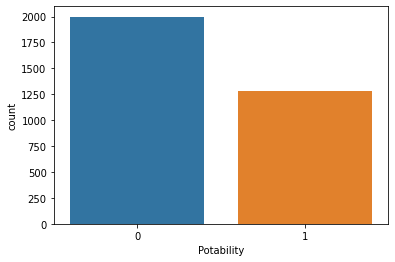

In [457]:
sb.countplot(y)

In [458]:
from imblearn.over_sampling import SMOTE

In [459]:
sam=SMOTE()

In [460]:
x_res,y_res=sam.fit_resample(x,y)

C:\Users\GauravSah\anaconda3\envs\water_quality\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Potability', ylabel='count'>

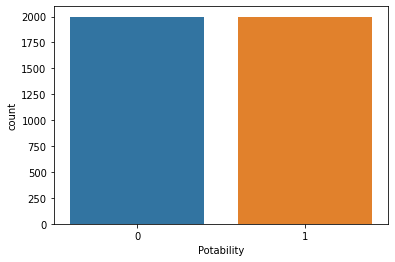

In [461]:
sb.countplot(y_res)

In [462]:
from sklearn.model_selection import train_test_split

In [463]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.3)

In [470]:
n_estimators=[int(x) for x in np.arange(10,1000,10)]
criterion=["gini","entropy"]
max_depth=[int(x) for x in np.arange(3,10,1)]

In [471]:
param_grid={"n_estimators":n_estimators,"criterion":criterion,"max_depth":max_depth}

In [473]:
from sklearn.model_selection import RandomizedSearchCV

In [464]:
from sklearn.ensemble import RandomForestClassifier

In [465]:
classifier=RandomForestClassifier()

In [474]:
rand_classifier=RandomizedSearchCV(classifier,param_grid,cv=5)

In [475]:
rand_classifier.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                                                         160, 170, 180, 190,
                                                         200, 210, 220, 230,
                                                         240, 250, 260, 270,
                                                         280, 290, 300, ...]})

In [476]:
rand_classifier.best_params_

{'n_estimators': 470, 'max_depth': 9, 'criterion': 'gini'}

In [479]:
y_pred=rand_classifier.predict(x_test)

In [468]:
from sklearn import metrics

In [480]:
metrics.accuracy_score(y_test,y_pred)

0.6839032527105922